# Express sklearn pipeline as codeflare pipeline
Reference: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html#sphx-glr-auto-examples-neural-networks-plot-rbm-logistic-classification-py

In [1]:
%matplotlib inline

Automatically created module for IPython interactive environment
[BernoulliRBM] Iteration 1, pseudo-likelihood = -25.57, time = 0.10s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -23.68, time = 0.14s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -22.74, time = 0.15s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -21.83, time = 0.14s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -21.62, time = 0.15s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -21.11, time = 0.10s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -20.88, time = 0.13s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -20.58, time = 0.13s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -20.32, time = 0.13s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -20.13, time = 0.13s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.91      0.93      0.92       184
           2       0.94      0.95      0.

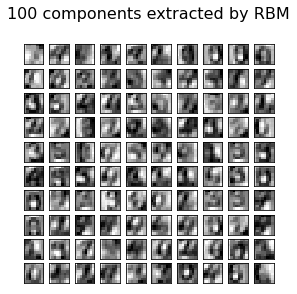

In [2]:
print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import minmax_scale
from sklearn.base import clone


# #############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


# Load Data
X, y = datasets.load_digits(return_X_y=True)
X = np.asarray(X, 'float32')
X, Y = nudge_dataset(X, y)
X = minmax_scale(X, feature_range=(0, 1))  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, Y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, Y_train)

# #############################################################################
# Evaluation

Y_pred = rbm_features_classifier.predict(X_test)
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

Y_pred = raw_pixel_classifier.predict(X_test)
print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

2021-07-19 11:01:26,551	INFO services.py:1267 -- View the Ray dashboard at http://127.0.0.1:8266


(pid=8995) [BernoulliRBM] Iteration 1, pseudo-likelihood = -25.57, time = 0.11s
(pid=8995) [BernoulliRBM] Iteration 2, pseudo-likelihood = -23.68, time = 0.15s
(pid=8995) [BernoulliRBM] Iteration 3, pseudo-likelihood = -22.74, time = 0.15s
(pid=8995) [BernoulliRBM] Iteration 4, pseudo-likelihood = -21.83, time = 0.16s
(pid=8995) [BernoulliRBM] Iteration 5, pseudo-likelihood = -21.62, time = 0.15s
(pid=8995) [BernoulliRBM] Iteration 6, pseudo-likelihood = -21.11, time = 0.14s
(pid=8995) [BernoulliRBM] Iteration 7, pseudo-likelihood = -20.88, time = 0.13s
(pid=8995) [BernoulliRBM] Iteration 8, pseudo-likelihood = -20.58, time = 0.15s
(pid=8995) [BernoulliRBM] Iteration 9, pseudo-likelihood = -20.32, time = 0.15s
(pid=8995) [BernoulliRBM] Iteration 10, pseudo-likelihood = -20.13, time = 0.15s
Logistic regression using RBM features:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       174
           1       0.91      0.93      0.92       

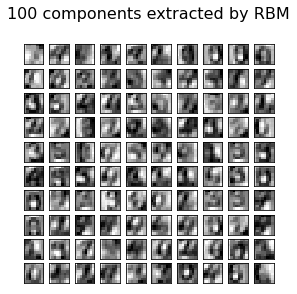

In [3]:
import ray
import codeflare.pipelines.Datamodel as dm
import codeflare.pipelines.Runtime as rt
from codeflare.pipelines.Datamodel import Xy
from codeflare.pipelines.Datamodel import XYRef
from codeflare.pipelines.Runtime import ExecutionType

ray.shutdown()
ray.init()

# #############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    def shift(x, w):
        return convolve(x.reshape((8, 8)), mode='constant', weights=w).ravel()

    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y


# Load Data
X, y = datasets.load_digits(return_X_y=True)
X = np.asarray(X, 'float32')
X, Y = nudge_dataset(X, y)
X = minmax_scale(X, feature_range=(0, 1))  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=0, verbose=True)

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000

# Training RBM-Logistic Pipeline

pipeline = dm.Pipeline()
node_rbm = dm.EstimatorNode('rbm', rbm)
node_logistic = dm.EstimatorNode('logistic', logistic)

raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
node_raw_pixel = dm.EstimatorNode('raw_pixel', raw_pixel_classifier)

pipeline.add_edge(node_rbm, node_logistic)
pipeline.add_edge(node_rbm, node_raw_pixel)

# create training input
train_input = dm.PipelineInput()
train_input.add_xy_arg(node_rbm, dm.Xy(X_train, Y_train))

pipeline_fitted = rt.execute_pipeline(pipeline, ExecutionType.FIT, train_input)

# #############################################################################
# Evaluation
predict_input = dm.PipelineInput()
predict_input.add_xy_arg(node_rbm, dm.Xy(X_test, Y_test))
#predict_input.add_xy_arg(node_raw_pixel, dm.Xy(X_test, Y_test))

logistic_pipeline = rt.select_pipeline(pipeline_fitted, pipeline_fitted.get_xyrefs(node_logistic)[0])
Y_pred = ray.get(rt.execute_pipeline(logistic_pipeline, ExecutionType.PREDICT, predict_input)
                         .get_xyrefs(node_logistic)[0].get_yref())

print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

raw_pixel_pipeline = rt.select_pipeline(pipeline_fitted, pipeline_fitted.get_xyrefs(node_raw_pixel)[0])
Y_pred = ray.get(rt.execute_pipeline(raw_pixel_pipeline, ExecutionType.PREDICT, predict_input)
                         .get_xyrefs(node_raw_pixel)[0].get_yref())

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(Y_test, Y_pred)))

# #############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(logistic_pipeline.get_nodes()['rbm'].get_estimator().components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

ray.shutdown()